In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Loading the model

In [39]:
model = tf.keras.models.load_model('./models/object_detection.h5')
print('Model has loaded sucessfully')

Model has loaded sucessfully


In [92]:
path = './testimages/licensed_car1.jpeg'
image = load_img(path)
image = np.array(image, dtype = np.uint8) # 8bit array
image1 = load_img(path, target_size = (224, 224))
image_arr_224 = img_to_array(image1)/255.0 # Convert into array and get the normalised output

In [93]:
# Size of original image
h, w, d, = image.shape
print("Height: ", h)
print("Width: ", w)

Height:  449
Width:  494


<function matplotlib.pyplot.show(close=None, block=None)>

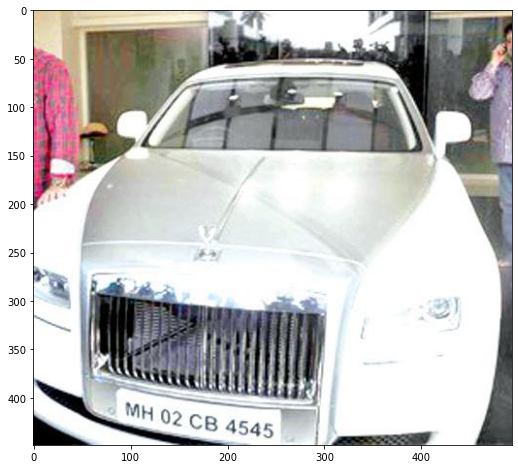

In [94]:
plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show

In [95]:
image_arr_224.shape

(224, 224, 3)

In [96]:
test_arr = image_arr_224.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [97]:
# Make predictions
coordinates = model.predict(test_arr)
coordinates

array([[0.17755848, 0.63407177, 0.8809557 , 0.98297286]], dtype=float32)

In [98]:
# Denormalise data
denorm = np.array([w, w, h, h])
coordinates = coordinates * denorm
coordinates = coordinates.astype(np.int32)
coordinates

array([[ 87, 313, 395, 441]])

(87, 395) (313, 441)


<function matplotlib.pyplot.show(close=None, block=None)>

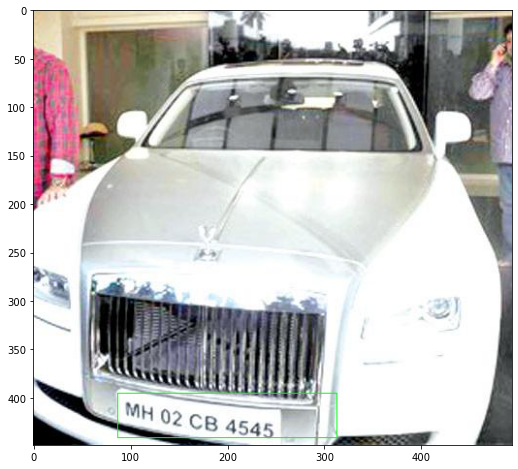

In [99]:
xmin, xmax, ymin, ymax = coordinates[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
print(pt1, pt2)
cv2.rectangle(image, pt1, pt2, (0, 255, 0, 3))

plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show